In [1]:
import torch
import sys
import numpy as np
sys_path = 'D:/Research_CAE/MyTinyCUDANN/tiny-cuda-nn/main'
sys.path.append(sys_path)
from PDE import Wave_equation
from matplotlib import pyplot as plt
device = "cpu" #torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

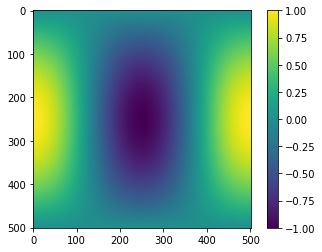

In [10]:
equation = Wave_equation()
# generate grid points for [0,1] * [0,1]
field_min = 0
field_max = 1
resolution = 501
x1_list = np.linspace(field_min, field_max, resolution)
x2_list = np.linspace(field_min, field_max, resolution)
X1,X2 = np.meshgrid(x1_list,x2_list)
X_field = torch.tensor(np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis = 1)).float().to(device)
real_solution = equation.real_solution(X_field)
real_solution = real_solution.reshape(resolution,resolution)
plt.imshow(real_solution)
plt.colorbar()

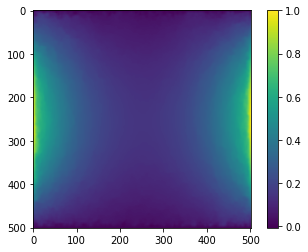

In [16]:
pred = np.loadtxt("D:\\Research_CAE\\MyTinyCUDANN\\tiny-cuda-nn\\main\\Wave_equation\\Tasks\\GridMLP_decoupled\\config_1\\pred_0.txt")
pred = pred.reshape(501,501)
plt.imshow(pred)
plt.colorbar()

In [6]:
from torch.autograd import grad

In [8]:
X = torch.tensor([[0.4,0.3]], requires_grad=True)
u = equation.real_solution(X)
grad_u = grad(u,X,torch.ones(1),retain_graph=True, create_graph=True)[0]
u_t,u_x = grad_u[:,0],grad_u[:,1]
grad_u_x = grad(u_x,X,torch.ones(1),retain_graph=True, create_graph=True)[0]
u_xx = grad_u_x[:,1]
grad_u_t = grad(u_t,X,torch.ones(1),retain_graph=True, create_graph=True)[0]
u_tt = grad_u_t[:,0]
u_tt - 2**2*u_xx

tensor([0.], grad_fn=<SubBackward0>)

In [19]:
X_field.requires_grad = True
solution = equation.real_solution(X_field)
grad_u = grad(solution,X_field,torch.ones(X_field.shape[0]),retain_graph=True, create_graph=True)[0]
u_t,u_x = grad_u[:,0],grad_u[:,1]
(0.5*u_t**2 - 0.5*4*u_x**2).mean()

tensor(-0.0394, grad_fn=<MeanBackward0>)